In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
# df.head()
#df.shape
#df.info()
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
#df['salary'] = df['salary'].replace(['low','medium','high'], (0,1,2))
df = pd.get_dummies(df)
corr = df.corr()
print(corr)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales_IT                         0.006373         0.001269        0.003287   
sales_RandD                      0.006615        -0.005471        0.009703   
sales_accounting                -0.028649         0.002193        0.004189   
sales_hr                        -0.012841        -0.009645      

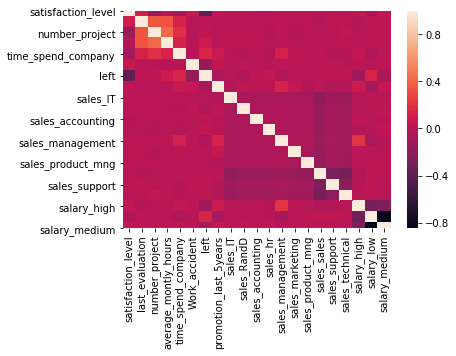

In [4]:
sns.heatmap(corr)
plt.show()

In [5]:
tm = df.groupby('left').mean()
tm

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
left,,,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.101068,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.022963,0.608233,0.368804


In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [7]:
df.groupby("left")['time_spend_company'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


In [8]:
df.groupby('left')["average_montly_hours"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,199.060203,45.682731,96.0,162.0,198.0,238.0,287.0
1,3571.0,207.419210,61.202825,126.0,146.0,224.0,262.0,310.0


In [9]:
df.groupby('left')["promotion_last_5years"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.026251,0.159889,0.0,0.0,0.0,0.0,1.0
1,3571.0,0.005321,0.072759,0.0,0.0,0.0,0.0,1.0


In [10]:
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v1-v2)/(v1+v2))

satisfaction_level       0.204815
last_evaluation          0.001841
number_project           0.009008
average_montly_hours     0.020564
time_spend_company       0.068417
Work_accident            0.574284
promotion_last_5years    0.662952
sales_IT                 0.043957
sales_RandD              0.264685
sales_accounting         0.073896
sales_hr                 0.135348
sales_management         0.298450
sales_marketing          0.004104
sales_product_mng        0.052597
sales_sales              0.018683
sales_support            0.029600
sales_technical          0.048796
salary_high              0.629723
salary_low               0.149393
salary_medium            0.097853
dtype: float64

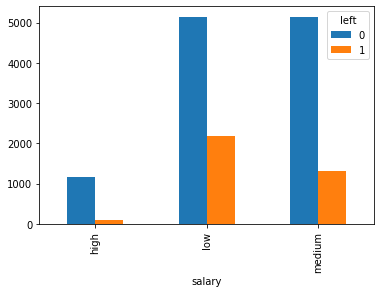

In [11]:
df = pd.read_csv("HR_comma_sep.csv")
pd.crosstab(df['salary'], df['left']).plot(kind = 'bar')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [13]:
df = pd.read_csv("HR_comma_sep.csv")
df.drop(['last_evaluation', 'number_project'], axis='columns', inplace=True)
df['salary'].replace(['low','medium','high'],[1,2,3], inplace = True)
df = pd.get_dummies(df)

In [14]:
y = df['left']
df.drop('left', axis='columns',inplace=True)
x = df

In [15]:
x.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [17]:
x['average_montly_hours'] = pd.cut(x['average_montly_hours'], bins=[0,150,200,1000],
                                  labels = [2,1,3])
x['time_spend_company'] = pd.cut(x['time_spend_company'], bins=[0,2,5,1000], labels=[3,2,1])


x['average_montly_hours'] = x['average_montly_hours'].astype(np.int)
x['time_spend_company'] = pd.cut(x['time_spend_company'].astype(np.int)

TypeError: cut() got an unexpected keyword argument 'astype'

In [ ]:
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# model = LogisticRegression()
# model = RandomForestClassifier()
model = XGBClassifier()
model.fit(x_train,y_train)
print(model.score(x_test, y_test))

In [ ]:
y_pred = model.predict(x_test)
print("left     : ", sum(y_pred == 1))
print("Not left : ", sum(y_pred == 0))
print("Accuracy : ", (accuracy_score(y_test, y_pred))*100)
print("\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)